In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import svm
import csv
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import array
import glob
import time
import csv
import os
import re
import random
from random import shuffle

### Import all training images, image names, and image labels from the training sets

In [2]:
num_train_img1 = 1700  #for labels 2,5,6
num_train_img2 = 5000  #the rest except for 4
num_train_img3 = 10000  #for label 4

# create lists to store the image paths and image names
artic_truck = []
background = []
bicycle = []
bus = []
car = []
motorcycle = []
nonM_vehicle = []
pedes = []
pickup_truck = []
su_truck = []
work_van = []


artic_truck_name = []
background_name = []
bicycle_name = []
bus_name = []
car_name = []
motorcycle_name = []
nonM_vehicle_name = []
pedes_name = []
pickup_truck_name = []
su_truck_name = []
work_van_name = []

# Each for loop extracts the image name (a number ID) and image path 
# for all training images in the corresponding category
for i in range(num_train_img2):
    name = random.choice(os.listdir("./train/articulated_truck/"))
    m = re.search('0(.+?).jpg', name)
    if m:
        found = m.group(1)
        found = int(float(found))
    artic_truck_name.append(found)
    
    path = './train/articulated_truck/%s' % name
    artic_truck.append(path)

    
for i in range(num_train_img2):
    name = random.choice(os.listdir("./train/background/"))
    m = re.search('0(.+?).jpg', name)
    if m:
        found = m.group(1)
        found = int(float(found))
    background_name.append(found)
    
    path = './train/background/%s' % name
    background.append(path)


for i in range(num_train_img1):
    name = random.choice(os.listdir("./train/bicycle/"))
    m = re.search('0(.+?).jpg', name)
    if m:
        found = m.group(1)
        found = int(float(found))
    bicycle_name.append(found)
    
    path = './train/bicycle/%s' % name
    bicycle.append(path) 
    
    
for i in range(num_train_img2):
    name = random.choice(os.listdir("./train/bus/"))
    m = re.search('0(.+?).jpg', name)
    if m:
        found = m.group(1)
        found = int(float(found))
    bus_name.append(found)
    
    path = './train/bus/%s' % name
    bus.append(path)    
    
    
for i in range(num_train_img3):
    name = random.choice(os.listdir("./train/car/"))
    m = re.search('0(.+?).jpg', name)
    if m:
        found = m.group(1)
        found = int(float(found))
    car_name.append(found)
    
    path = './train/car/%s' % name
    car.append(path)    
    
for i in range(num_train_img1):
    name = random.choice(os.listdir("./train/motorcycle/"))
    m = re.search('0(.+?).jpg', name)
    if m:
        found = m.group(1)
        found = int(float(found))
    motorcycle_name.append(found)
    
    path = './train/motorcycle/%s' % name
    motorcycle.append(path)

for i in range(num_train_img1):
    name = random.choice(os.listdir("./train/non-motorized_vehicle/"))
    m = re.search('0(.+?).jpg', name)
    if m:
        found = m.group(1)
        found = int(float(found))
    nonM_vehicle_name.append(found)
    
    path = './train/non-motorized_vehicle/%s' % name
    nonM_vehicle.append(path) 
    
    
for i in range(num_train_img2):
    name = random.choice(os.listdir("./train/pedestrian/"))
    m = re.search('0(.+?).jpg', name)
    if m:
        found = m.group(1)
        found = int(float(found))
    pedes_name.append(found)
    
    path = './train/pedestrian/%s' % name
    pedes.append(path)
    

for i in range(num_train_img2):
    name = random.choice(os.listdir("./train/pickup_truck/"))
    m = re.search('0(.+?).jpg', name)
    if m:
        found = m.group(1)
        found = int(float(found))
    pickup_truck_name.append(found)
    
    path = './train/pickup_truck/%s' % name
    pickup_truck.append(path)

    
for i in range(num_train_img2):
    name = random.choice(os.listdir("./train/single_unit_truck/"))
    m = re.search('0(.+?).jpg', name)
    if m:
        found = m.group(1)
        found = int(float(found))
    su_truck_name.append(found)
    
    path = './train/single_unit_truck/%s' % name
    su_truck.append(path) 


for i in range(num_train_img2):
    name = random.choice(os.listdir("./train/work_van/"))
    m = re.search('0(.+?).jpg', name)
    if m:
        found = m.group(1)
        found = int(float(found))
    work_van_name.append(found)
    
    path = './train/work_van/%s' % name
    work_van.append(path)
    
    
# X = training_image 
# X = [artic_truck,background,bicycle,bus,car,motorcycle,nonM_vehicle,
#      pedes,pickup_truck,su_truck,work_van]
X = []
X.append(artic_truck)
X.append(background)
X.append(bicycle)
X.append(bus)
X.append(car)
X.append(motorcycle)
X.append(nonM_vehicle)
X.append(pedes)
X.append(pickup_truck)
X.append(su_truck)
X.append(work_van)


# X_name = training_name (the numbers --> 00053672, etc)
X_name = []
X_name.append(artic_truck_name)
X_name.append(background_name)
X_name.append(bicycle_name)
X_name.append(bus_name)
X_name.append(car_name)
X_name.append(motorcycle_name)
X_name.append(nonM_vehicle_name)
X_name.append(pedes_name)
X_name.append(pickup_truck_name)
X_name.append(su_truck_name)
X_name.append(work_van_name)

# X_label = training_label (artic_truck = 0, background = 1,....)
X_label= []
length = 0
for i in range(11):
    if (i==2 or i==5 or i==6):
        length = num_train_img1  #1700 for bicycle, motorcycle, nonM_vehicle
    elif(i==4):
        length = num_train_img3  #10000 for car
    else:
        length = num_train_img2  #5000 for all other categories
    for j in range(length):
        X_label.append(i)


# superX = [[img_path1, name1, label1],[img_path2, name2, label2]......]
superX = []
element = []
length = 0
total_length = 0
for i in range(11):
    if (i==2 or i==5 or i==6):
        length = num_train_img1  #1700 for bicycle, motorcycle, nonM_vehicle
    elif(i==4):
        length = num_train_img3  #10000 for car
    else:
        length = num_train_img2  #5000 for all the other categories
    
    for j in range(length):
        element.append(X[i][j])
        element.append(X_name[i][j])
        element.append(X_label[total_length+j])
        superX.append(element)
        element = []
    total_length += length
    print(i)   # print the iteration number to indicate the loading progress

print("done")

0
1
2
3
4
5
6
7
8
9
10
done


### Define the getHoG() function, which extracts HoG features of the input image array

In [5]:
# Creat a function that takes list of images as input
def getHoG(image_list):
    cell_size = (8, 8)   # h x w in pixels
    block_size = (2, 2)  # h x w in cells
    nbins = 8            # number of orientation bins
    hog_feature = []
    for element in image_list:
        hog = cv2.HOGDescriptor(_winSize=(element.shape[1] // cell_size[1] * cell_size[1],
                                  element.shape[0] // cell_size[0] * cell_size[0]),
                        _blockSize=(block_size[1] * cell_size[1],
                                    block_size[0] * cell_size[0]),
                            _blockStride=(cell_size[1], cell_size[0]),
                        _cellSize=(cell_size[1], cell_size[0]),
                        _nbins=nbins)
        n_cells = (element.shape[0] // cell_size[0], element.shape[1] // cell_size[1])
    
        hog_feats = hog.compute(element)\
                   .reshape(n_cells[1] - block_size[1] + 1,
                        n_cells[0] - block_size[0] + 1,
                        block_size[0], block_size[1], nbins) \
                   .transpose((1, 0, 2, 3, 4))  # index blocks by rows first 
    
        gradients = np.full((n_cells[0], n_cells[1], 8), 0, dtype=float)
        cell_count = np.full((n_cells[0], n_cells[1], 1), 0, dtype=int)
    
        for off_y in range(block_size[0]):
            for off_x in range(block_size[1]):
                gradients[off_y:n_cells[0] - block_size[0] + off_y + 1,
                      off_x:n_cells[1] - block_size[1] + off_x + 1] += \
                hog_feats[:, :, off_y, off_x, :]
                cell_count[off_y:n_cells[0] - block_size[0] + off_y + 1,
                       off_x:n_cells[1] - block_size[1] + off_x + 1] += 1 
        gradients /= cell_count
        gradients = np.reshape(gradients, gradients.size)
        hog_feature.append(gradients) 
    return hog_feature

### Prepare the HoG features, names and labels needed for classification

In [6]:
# extract images from X and labels from X_label

img_total_X = []
length_X = 0
for i in range(11):
    if (i==2 or i==5 or i==6):
        length_X = num_train_img1  #1700 for bicycle, motorcycle, nonM_vehicle
    elif(i==4):
        length_X = num_train_img3  #10000 for car
    else:
        length_X = num_train_img2  #5000 for all the other categories
    
    for j in range(length_X):
        image_X = cv2.imread(X[i][j])
        image_X = cv2.cvtColor(image_X, cv2.COLOR_BGR2GRAY)
        image_X = cv2.resize(image_X, (128, 128))
        img_total_X.append(image_X)


# extract HoG features from the training images
total_hog_X = getHoG(img_total_X)
total_hog_X = np.asarray(total_hog_X)

# extract the training image labels
total_label_X = X_label.copy()


### Classify the Images Generated by the Localizer
#### Compute accuracy, prediction, recall, and comfusion matrix

accuracy: 0.26811594202898553
precision: 0.26811594202898553
recall: 0.26811594202898553


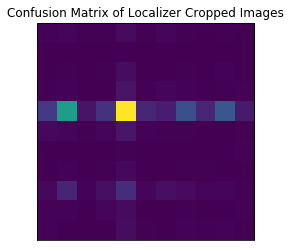

In [10]:
# obtain the ground truth labels from csv file
f = open('./crop_img_label.csv')
csv_label = csv.reader(f)

gt_label = []
for row in csv_label:
    label = int(row[1])
    gt_label.append(label)
    
gt_label = np.asarray(gt_label)

# read cropped images from localizer
crop_img_array = []    
for path in glob.glob("./crop_image/*.jpg"):
    crop_img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)
    crop_img = cv2.resize(crop_img, (128, 128))
    crop_img_array.append(crop_img)

crop_img_array = np.asarray(crop_img_array)

# calculate HoG features for cropped images
hog_crop_img = getHoG(crop_img_array)
hog_crop_img = np.asarray(hog_crop_img)

# train the logistic_regression_classifier and calculate prediction using cropped images
log_crop = LogisticRegression()
log_crop.fit(total_hog_X, total_label_X)
prediction_crop = log_crop.predict(hog_crop_img)   

# calculate accuracy
correct = 0
for i in range(len(prediction_crop)):
    if prediction_crop[i] == gt_label[i]:
        correct += 1
accuracy_crop = correct/len(prediction_crop)

# calculate precision
precision_crop = precision_score(gt_label, prediction_crop, average='micro') 

# calcualte recall
recall_crop = recall_score(gt_label, prediction_crop, average='micro')  

# calculate confustion matrix
conf_crop = confusion_matrix(gt_label, prediction_crop)

# display the calculated accuracy, precision, recall and confusion matrix
print("accuracy:",accuracy_crop)
print("precision:", precision_crop)
print("recall:", recall_crop)
plt.figure()
plt.imshow(conf_crop)
plt.title("Confusion Matrix of Localizer Cropped Images"), plt.xticks([]), plt.yticks([])
plt.show()



#### -Is there a difference between using localizer + classifier vs. classification data + classifier?
The accuracy, precision and recall are lower compared to the combination of classification data and classifier. This is because the results from the localizer are not accurate and there might be a mismatch between the actual cropped image and the ground truth label. In addition, there might be more than one object that are contained in the cropped images. 

#### -Should the ‘background’ label of the classifier be included when evaluating the performance of the localizer? 
Yes. Theoretically, the classifier from Section 2 can be used directly to classify the cropped images. Ideally, the classified labels should not contain any ‘background’ labels, because the localizer should not crop the background out theoretically. However, in our case, there are some cars recognized as ‘background’ and there are a couple of reasons for this. First, our classifier is not perfect (only has accuracy of about 60%). Second, the cropped images that the localizer generated may contain a lot of ground, and relatively less portions of the cars (this can also be shown from our low DICE coefficients).